Predicting house prices is one of the most practical and impactful applications of machine learning in the real world. Whether you're a homebuyer, real estate agent, investor, or developer, accurate price estimation helps make informed decisions in a dynamic housing market.


**A Peek at How It Works**

Imagine teaching a computer to recognize what makes a house expensive or affordable by showing it thousands of past sales - considering factors like size, location, and number of bedrooms. That's essentially what we'll be doing with XGBoost, just in a more sophisticated way!

In [42]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn import metrics

Importing the California Housing Price Dataset

In [13]:
# Load the dataset
california = fetch_california_housing()

# Convert to Pandas DataFrame
housing_df = pd.DataFrame(california.data, columns=california.feature_names)

Bunch Object vs DataFrame:

fetch_california_housing() returns a dictionary-like object

Doesn't have DataFrame methods like .head()

Proper Conversion:

We explicitly create a DataFrame

Use the feature names from the Bunch object as column names

Add the target variable separately

In [14]:
#print first 5 rows of the dataset
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
housing_df.shape

(20640, 8)

In [18]:
#print last 5 rows of the dataset
housing_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [19]:
#getting some info about the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Feature Columns (Input Variables)
MedInc - Median income of households in the area (in $10,000s)

HouseAge - Median age of houses in the area (in years)

AveRooms - Average number of rooms per household

AveBedrms - Average number of bedrooms per household

Population - Total population in the area

AveOccup - Average number of household members

Latitude - Latitude coordinate of the area

Longitude - Longitude coordinate of the area

Target Variable (Output to Predict)
MedHouseVal - Median house value for households in the area (in $100,000s)

In [20]:
#checking for missing values
housing_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [21]:
#statistical measures about the data
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [22]:
# Show columns
print(housing_df.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [29]:
#Adding target column
housing_df['MedHouseVal'] = california.target

Visualizing the Dataset

**Distribution of Features**

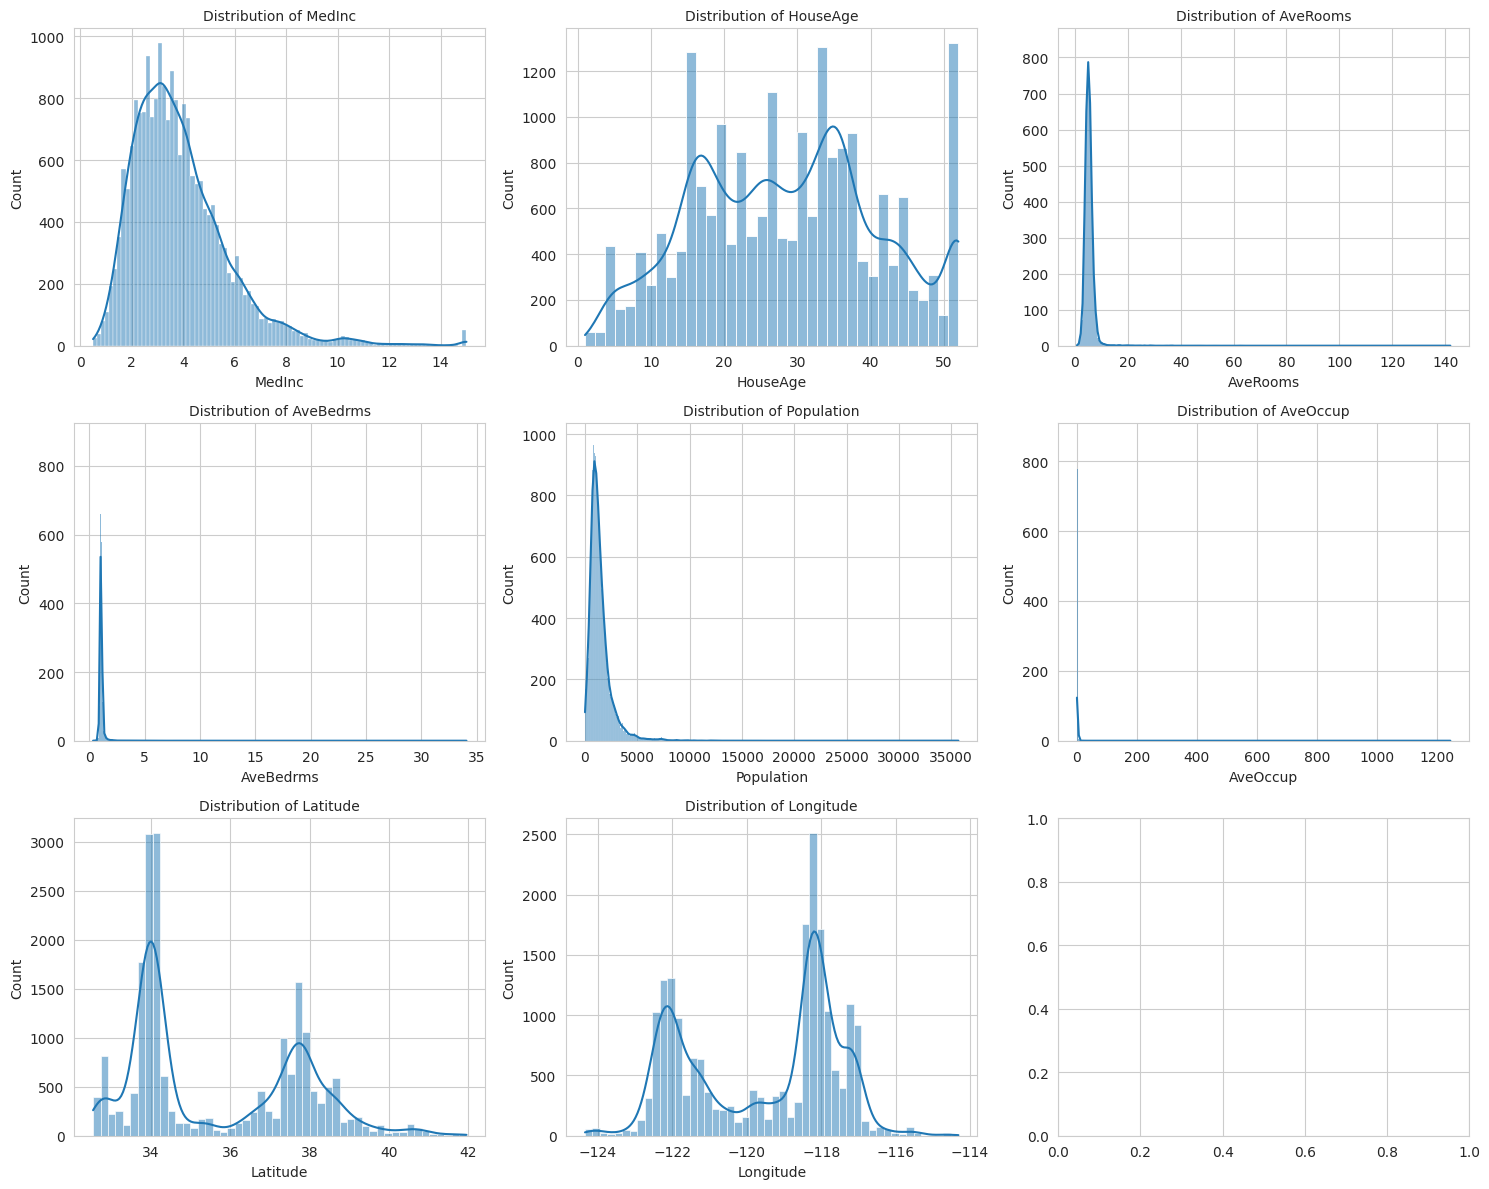

In [23]:
# Set style
sns.set_style("whitegrid")

# Plot distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(housing_df.columns):
    if col in ['Latitude', 'Longitude']:
        sns.histplot(housing_df[col], bins=50, kde=True, ax=axes[i])
    else:
        sns.histplot(housing_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=10)

plt.tight_layout()
plt.show()

Key Insights from These Distributions

Skewness: Most features are right-skewed, suggesting outliers need treatment (log transform?)

Geographic Clustering: Latitude/Longitude show where California's housing demand is concentrated

Capped Values: House prices are artificially capped at $500k (dataset limitation)

Room Metrics: AveRooms/AveBedrms distributions confirm typical home sizes

**Boxplot of Key Features**

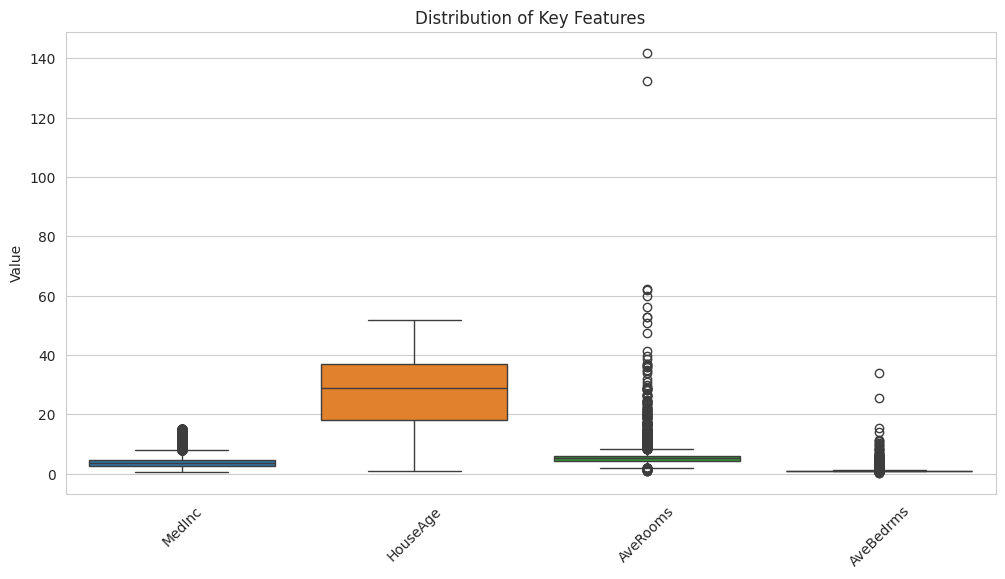

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']])
plt.title('Distribution of Key Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Key Insights from Your Housing Data Boxplot

MedInc (Median Income)

Median income ~$35k (3.5 in scaled $10k units)

Wide IQR ($20k-$70k) shows significant income disparity

Many high-income outliers → wealthy neighborhoods

HouseAge

Median age ~30 years

Even spread (25th %ile ~15y, 75th %ile ~45y)

Few outliers → most houses follow similar age distribution

AveRooms

Median ~5 rooms per household

Right-skewed (long upper whisker) → luxury homes/apartments pull average up

Many outliers → some very large properties

AveBedrms

Median ~1.5 bedrooms

Tighter distribution than AveRooms

Confirms most homes have 1-3 bedrooms

**Geographic Price Distribution**

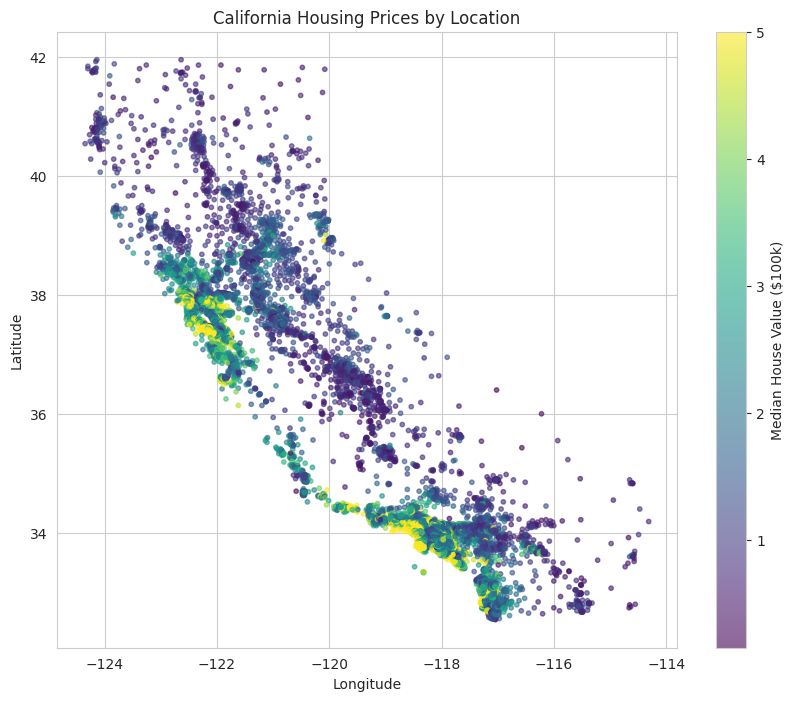

In [30]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(housing_df['Longitude'],
                     housing_df['Latitude'],
                     c=housing_df['MedHouseVal'],  # Fixed: = instead of -
                     cmap='viridis',
                     alpha=0.6,
                     s=10)
plt.colorbar(scatter).set_label('Median House Value ($100k)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')
plt.show()

Understanding the correlaation between the dataframe

1. Positive Correlation
2.Negative Correlation

In [31]:
correlation=housing_df.corr()

<Axes: >

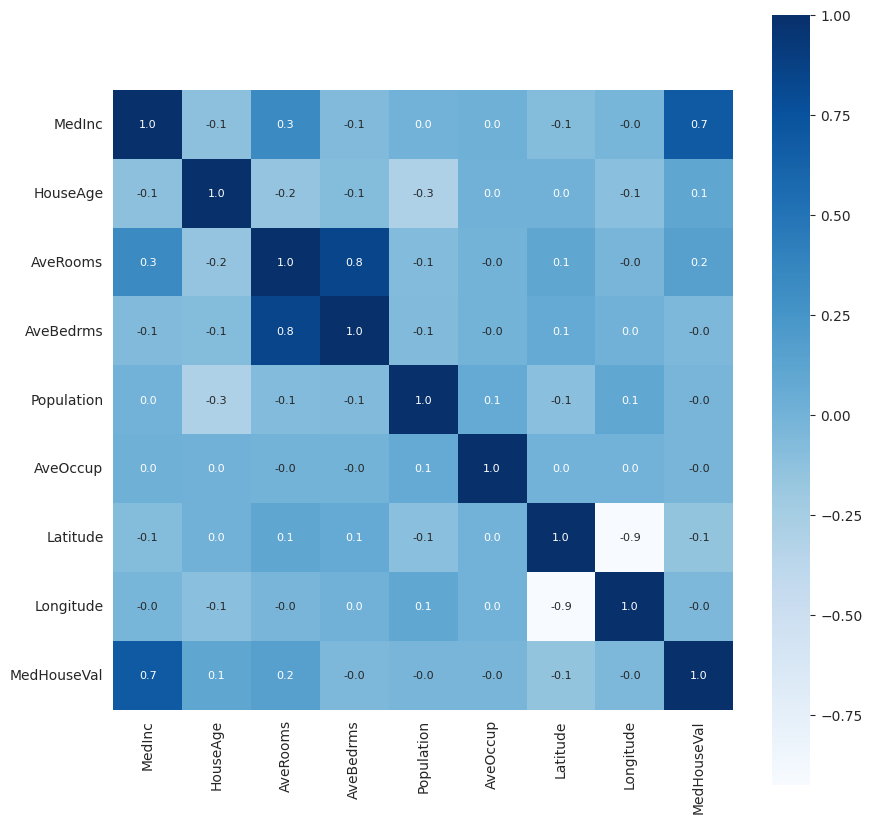

In [32]:
#constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Purpose: Visualizes how strongly each feature correlates with others (from -1 to 1)

1 = Perfect positive correlation

-1 = Perfect negative correlation

0 = No correlation

Your Partial Output Reveals:

MedInc (Income) strongly correlates with house prices (0.7)

AveRooms and AveBedrms are highly correlated (0.8) → Potential multicollinearity

Most other features show weak correlations



Strong Positive Correlation (Dark Blue):

Income (MedInc) → Price

Room count → Bedroom count

Weak/Negative Correlation (Light Blue/White):

Population → Price

HouseAge → Income

# **Building the Model**

**1. Feature Selection by Splitting the Data and Target**

In [34]:
# Remove highly correlated features (e.g., AveBedrms) and irrelevant columns
features = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Latitude', 'Longitude']
X = housing_df[features]
Y = housing_df['MedHouseVal']

In [35]:
print(X.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Latitude', 'Longitude']


In [36]:
print(X)

       MedInc  HouseAge  AveRooms  Population  Latitude  Longitude
0      8.3252      41.0  6.984127       322.0     37.88    -122.23
1      8.3014      21.0  6.238137      2401.0     37.86    -122.22
2      7.2574      52.0  8.288136       496.0     37.85    -122.24
3      5.6431      52.0  5.817352       558.0     37.85    -122.25
4      3.8462      52.0  6.281853       565.0     37.85    -122.25
...       ...       ...       ...         ...       ...        ...
20635  1.5603      25.0  5.045455       845.0     39.48    -121.09
20636  2.5568      18.0  6.114035       356.0     39.49    -121.21
20637  1.7000      17.0  5.205543      1007.0     39.43    -121.22
20638  1.8672      18.0  5.329513       741.0     39.43    -121.32
20639  2.3886      16.0  5.254717      1387.0     39.37    -121.24

[20640 rows x 6 columns]


In [37]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


**2.Splitting the data into Training and Test Data**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [40]:
X_train.shape,X_test.shape

((14448, 6), (6192, 6))

**3.Standardizing the Data**

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**4.Model Selection and Training**

XGBoost Regressor

In [45]:
from xgboost import XGBRegressor

#loading the model
model=XGBRegressor(
    n_estimators=100,  # Fewer trees for faster training
    max_depth=3,       # Shallower trees prevent overfitting
    random_state=42    # For reproducibility
)

In [47]:
#training the model with X_train

model.fit(
    X_train_scaled, Y_train,
    eval_set=[(X_test_scaled, Y_test)],
    verbose=100
)

[0]	validation_0-rmse:0.99316
[99]	validation_0-rmse:0.51090


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

eval_set=[(X_test, y_test)]

Acts like a "practice test" during training

After every round of learning, the model checks:

How well it's doing on the training data (X_train)

How well it generalizes to unseen data (X_test)

Helps spot overfitting (if training error keeps decreasing but test error starts rising)

verbose=100

Controls how much output you see during training:

0: Silent (no output)

1: Basic progress

100: Print metrics every 100 trees (nice balance)

**5.Evaluation**

Prediction on Training Data

In [48]:
#accuracy for prediction on training data
training_data_prediction=model.predict(X_train_scaled)

In [49]:
# R squared error
score_1=metrics.r2_score(Y_train, training_data_prediction)

In [50]:
# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_train, training_data_prediction)

In [53]:
print("R squared error : ",score_1)
print("Mean Absolute Error : ",score_2)

R squared error :  0.8259165900597502
Mean Absolute Error :  0.3386823972913368


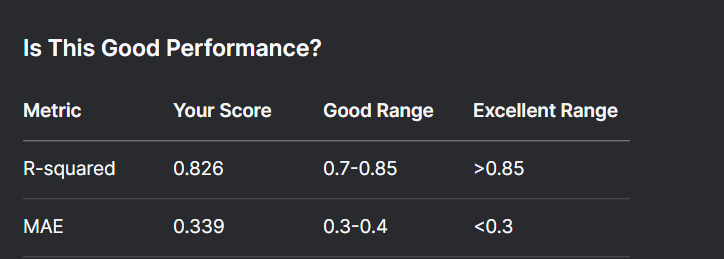

Visualizing the Actual Prices and Predicted Prices

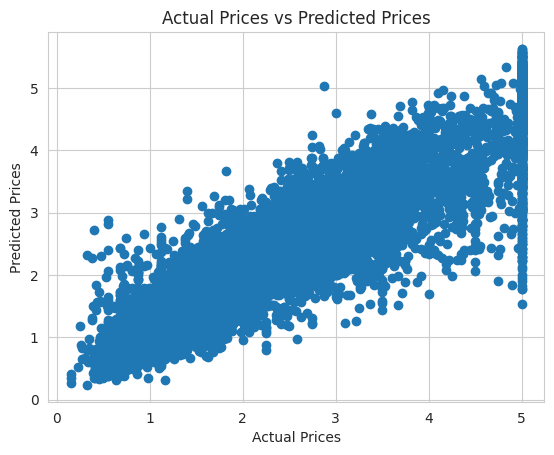

In [57]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on Test Data

In [54]:
#accuracy for prediction on training data
test_data_prediction=model.predict(X_test_scaled)

In [55]:
# R squared error
score_1=metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ",score_1)
print("Mean Absolute Error : ",score_2)

R squared error :  0.8011380165053916
Mean Absolute Error :  0.3541478277431617
